In [1]:
import DataPrepTulips3D as DP
import matplotlib.pyplot as plt
import numpy as np
import copy

In [9]:
d = DP.loadMesaData(mesa_LOGS_directory = "../../../example_MESA_data/binary/Profiles/LOGS1", \
                    t_resolution = 1000, r_resolution = 100,\
                    filename_history = "history1.data",\
                   profiles=['logT', 'mass', 'logRho', 'he4'])
d.keys(), d["data_prof_t_r"].shape, d["prof_labels"]


(dict_keys(['info', 'MESA_file', 'filename_history', 'r_label', 'prof_labels', 't_resolution', 'r_resolution', 'data_prof_t_r', 'data_r_max', 'data_t']),
 (5, 1000, 100),
 ['logT', 'mass', 'logRho', 'he4', 'en'])

In [10]:
DP.save_to_pickle(d, "../../../example_MESA_data/DataDictFormat/binary.pkl")

In [7]:
d2 = DP.load_from_pickle("../../../example_MESA_data/DataDictFormat/binary.pkl")

In [8]:
d2.keys()

dict_keys(['info', 'MESA_file', 'filename_history', 'r_label', 'prof_labels', 't_resolution', 'r_resolution', 'data_prof_t_r', 'data_r_max', 'data_t'])

Text(0, 0.5, 'logT')

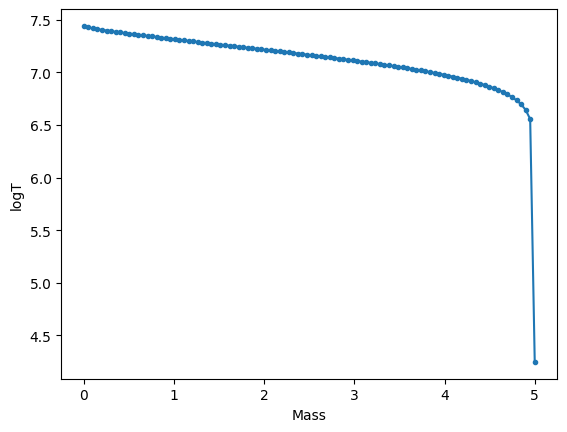

In [8]:
plt.plot(np.linspace(0., d['r_max'][0][0], 100), d['data_prof_t_r'][0][0], ".-")
plt.xlabel("Mass")
plt.ylabel("logT")

Text(0, 0.5, 'LogRho')

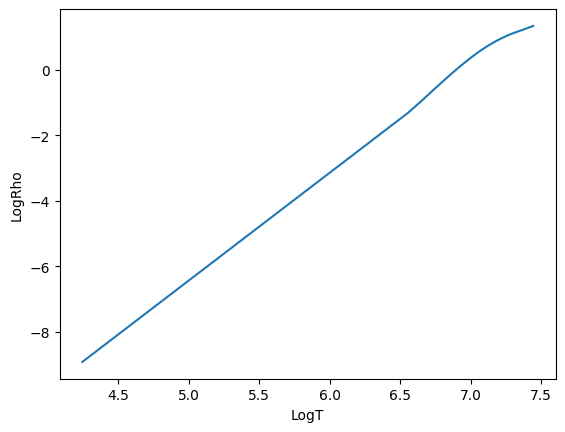

In [12]:
plt.plot(d['data_prof_t_r'][0][0], d['data_prof_t_r'][2][0])
plt.xlabel("LogT")
plt.ylabel("LogRho")

Text(0, 0.5, 'LogTeff')

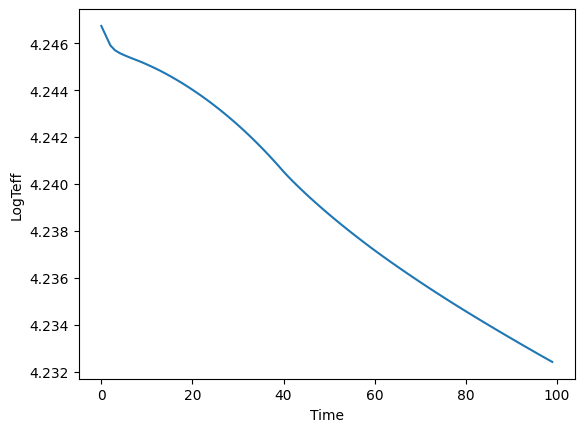

In [10]:
plt.plot(d['data_t']['logTeff'])
plt.xlabel("Time")
plt.ylabel("LogTeff")
         

## Load in MESA data

In [4]:
d = DP.loadMesaData(mesa_LOGS_directory = "../../../example_MESA_data/binary/Profiles/LOGS1", \
                    filename_history = "history1.data",\
                   profiles=['logT', 'mass', 'logRho', 'he4'])
# DP.loadMesaData(mesa_LOGS_directory = "../../../example_MESA_data/binary/Profiles/LOGS1", \
#                     filename_history = "history1.data",\
#                    profiles=['logT', 'mass', 'logRho', 'he4'])

In [5]:
d_original = copy.deepcopy(d)

# OLDDDDDD

## Lets see what we got:

In [6]:
d.print_summary()

--
** Content of Data1D object **
 * id = ../../../example_MESA_data/binary/Profiles/LOGS1/history1.data
 * Time grid length: 6447

Properties of the total object: 
 - stellar_mass (Tot): lenTime=6447
 - stellar_radius (Tot): lenTime=6447
 - logTeff (Tot): lenTime=6447
Properties as a function of radius: 
 - energy (Grid): lenTime=6447, , lenRadii=7
 - logR (Grid): lenTime=6447, , lenRadii=3976
 - logT (Grid): lenTime=6447, , lenRadii=3976
 - mass (Grid): lenTime=6447, , lenRadii=3976
 - logRho (Grid): lenTime=6447, , lenRadii=3976
 - he4 (Grid): lenTime=6447, , lenRadii=3976
--


In [7]:
d.reduceResolutionRadialData(max_nr_points=100)

Resetting:  energy
  - Done
Resetting:  logR
  - Done
Resetting:  logT
  - Done
Resetting:  mass
  - Done
Resetting:  logRho
  - Done
Resetting:  he4
  - Done


In [8]:
d.print_summary()

--
** Content of Data1D object **
 * id = ../../../example_MESA_data/binary/Profiles/LOGS1/history1.data
 * Time grid length: 6447

Properties of the total object: 
 - stellar_mass (Tot): lenTime=6447
 - stellar_radius (Tot): lenTime=6447
 - logTeff (Tot): lenTime=6447
Properties as a function of radius: 
 - energy (Grid): lenTime=6447, , lenRadii=7
 - logR (Grid): lenTime=6447, , lenRadii=100
 - logT (Grid): lenTime=6447, , lenRadii=100
 - mass (Grid): lenTime=6447, , lenRadii=100
 - logRho (Grid): lenTime=6447, , lenRadii=100
 - he4 (Grid): lenTime=6447, , lenRadii=100
--


## Lets plot the temperature a.f.o. radius at time index 0

getProperty gives you a list of pairs. Every entry is a different time index. For every time index the pair contains as a first entry the grid (logR) and as the second entry the property value, like logT.

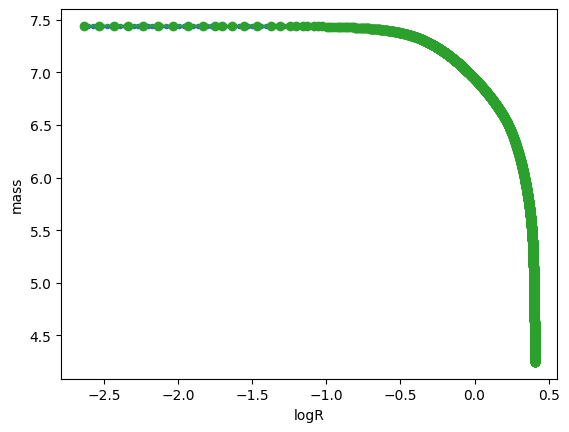

In [14]:
plt.plot(*d.getProperty("logT")[0], ".-")#d.getProperty("logT").getGrid()[0], d.getProperty("logT").getValue()[0])
plt.plot(*d_original.getProperty("logT")[0], "--")#d.getProperty("logT").getGrid()[0], d.getProperty("logT").getValue()[0])
plt.plot(r_grid, data_array[0][0], "o-")
plt.xlabel("logR")
plt.ylabel("mass")
plt.show()

## We can interpolate values, for example the generated energy

In [10]:
en_interp = d.getInterpolatedProperty('logT')

In [11]:
f"Interpolated value: {en_interp[0](d.getProperty('logT')[0][0][1])}, "+\
f"Real value: {d.getProperty('logT')[0][1][1]}"

'Interpolated value: 7.442751419108866, Real value: 7.442751419108865'

In [12]:
d.print_summary()

--
** Content of Data1D object **
 * id = ../../../example_MESA_data/binary/Profiles/LOGS1/history1.data
 * Time grid length: 6447

Properties of the total object: 
 - stellar_mass (Tot): lenTime=6447
 - stellar_radius (Tot): lenTime=6447
 - logTeff (Tot): lenTime=6447
Properties as a function of radius: 
 - energy (Grid): lenTime=6447, , lenRadii=7
 - logR (Grid): lenTime=6447, , lenRadii=100
 - logT (Grid): lenTime=6447, , lenRadii=100
 - mass (Grid): lenTime=6447, , lenRadii=100
 - logRho (Grid): lenTime=6447, , lenRadii=100
 - he4 (Grid): lenTime=6447, , lenRadii=100
--


In [13]:
DP.save_Data1D_to_pickle(d, "../../../example_MESA_data/Data1DFormat/binary.pkl")